# Generating Samples using Unitary Tensor Networks

The goal of this tutorial is to generate 50000 samples from a 1D Heisenberg chain consisting of 5 qubits using unitary tensor networks. We will additionally generate a file containing the amplitudes of the quantum state and then use these amplitudes to verify that our sampling is correct and sufficient. 

## 1D Heisenberg Model

Our dataset will contain 50000 $\sigma^{z}$ measurements from a 1D Heisenberg model with 5 qubits. The Hamiltonian for the Heisenberg model is given by

\begin{equation}
	\mathcal{H} = -\sum_{ij}{J_{ij}\textbf{S}_{i} \cdot \textbf{S}_{j}} + g\mu_{B}\sum_{i}{\textbf{S}_{i} \cdot \textbf{H}}
\end{equation}

For this tutorial, we will choose our coupling constants and external field such that we have the following Hamiltonian:

\begin{equation}
    \mathcal{H} = -\sum_{j = 1}^{N}{S_{j}^{x}S_{j+1}^{x} + S_{j}^{y}S_{j+1}^{y} + S_{j}^{z}S_{j+1}^{z}}
\end{equation}

where $S_{j}$ is the convential spin 1/2 Pauli operator on site $j$. Spins will be represented in binary notation with zero denoting spin down and one denoting spin up.

## Using SourKRAUT to generate and verify the samples

### Imports

We will begin by importing the required python packages.

In [1]:
import sys
sys.path.insert(0,"..")

import sourkraut.frequency as sfreq
import sourkraut.operator as soper
import sourkraut.sampler as sampler

The sampler module will be used to generate our samples. The function that will be used to generate the samples is the runSampling method. This method will simply generate and execute the C++/ITensor script based on the parameters that are specified. For our current example, we would like to generate 50000 samples for a system size of 50 qubits. We would additonally like to generate an amplitudes file and thus we will set the last parameter to True. It is recommended that the user avoid generating amplitudes for system sizes greater than 20 qubits due to its exponential scaling.

In [2]:
sampler.runSampling(50000,5,True)

Once executed, we will have an Amplitudes.txt file containing the probability coefficients for each possible configuration in ascending bitwise order, a Samples.txt file containing the $n$ measurements, and an Observables.txt file containing the true expected value of the $H$ observable as well as the $S_{2}S_{3}$ observable. While these additional are useful for RBM training, they are also useful for verifying that our simulation worked as expected. To begin with, our amplitudes can be used to compare the expected and measured frequencies of each possible configuration. This is shown below.

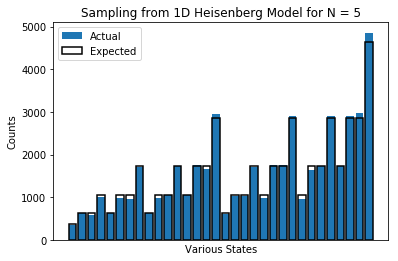

In [3]:
results = sfreq.freqCheck("Amplitudes.txt","Samples.txt",True,False)

The first boolean specifies whether or not we would like to plot the frequency histogram. For larger system sizes, plotting a histogram may take a while due to binning and may not be visually useful due to the exponential scaling of the number of possible states. The second boolean specifies whether or not to print the output, which shows the expected and measured frequencies for each possible state. This information can also be accessed from the dictionary returned by the freqCheck method.

We can also verify our sampling by measuring observables. Here we measure the average value of the Hamiltonian from the generated samples using the local estimator since $H$ is an off diagonal observable. We use the operatorCheck method to plot the relative error comparing our measured value with the true value calculated from ITensor. sampleVals specifies the $M$ values at which we would like to calculate the relative error.

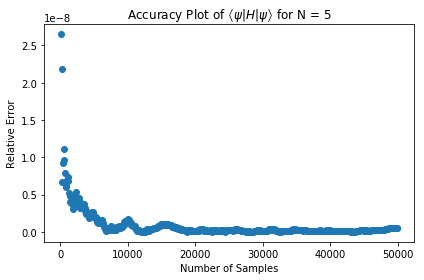

In [4]:
sampleVals = range(100,50000,100)
finalError = soper.operatorCheck("H",sampleVals,"Amplitudes.txt","Samples.txt","Observables.txt")